# 이해를 위한 정리

* $AQ = F$
* $Q = A^{-1}F$
* $A^TAQ = A^TF  \to Q = (A^TA)^{-1}A^TF$
* $\alpha Q_\alpha + A^TAQ_\alpha = A^TF \to Q_\alpha = (\alpha I + A^TA)^{-1} A^TF$


---




 ## $Q_\alpha = (\alpha I + A^TA)^{-1} A^TF$

 or

 ## $Q_n = \frac{F_n}{\alpha e^{n^2T} + e^{-n^2T}}, \quad\quad n = 1, 2, \cdots , N$



```
invA = np.diag(1/(alpha*np.exp((np.arange(1, N+1))**2*T)+np.exp(-(np.arange(1, N+1))**2*T)))
hatQ = invA@F
```



# Generate Data 


*   generate_Q
*   sol_act
*   noise_data
*   sol_Tik
*   result_gen_data
*   result_Lcurve



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

T = 1
delta = 0.01
N = 5
M = 10000

In [2]:
def generate_Q(N,  M, tau):
    ii = 0
    tore = tau*np.sqrt(2/np.pi)
    Q = []
    while ii < M:
        tempQ = 2*tore*np.random.rand(N) - tore
        tempQ = np.array(tempQ)
        if np.linalg.norm(tempQ) <= tore:
            Q = np.append(Q, tempQ)
            ii += 1
    return (Q.reshape(-1, N))

def sol_act(Q, T):
    N = len(Q[0])
    A = np.diag(np.exp(-(np.arange(1, N+1))**2*T))
    F = A@Q.T #A = NxN, Q = MxN, Q.T = NxM , F = NxM
    return F

def noise_data(F, delta):
    e = 2*np.random.rand(len(F[:,0]), len(F[0])) - 1
    N = len(F[:])
    for m in range(len(F[0])):
        norm = np.linalg.norm(F[:,m])
        e[:, m] = e[:, 0]*norm*delta
    nF = F+e
    return nF

def sol_Tik(alpha, T, F):
    N = len(F[:])
    invA = np.diag(1/(alpha*np.exp((np.arange(1, N+1))**2*T)+np.exp(-(np.arange(1, N+1))**2*T))) # A = NxN
    hatQ = invA@F 
    return hatQ

def result_gen_data(N, M, tau, Q, delta):
    #Q = generate_Q(N, M, tau)
    T = 1
    F = sol_act(Q, T)
    nF = noise_data(F, delta)
    np.savetxt('Q.txt', Q.T, fmt='%8f', delimiter = ',', header='')
    np.savetxt('F.txt', F, fmt='%8f', delimiter = ',', header='')
    np.savetxt('nF.txt', nF, fmt='%8f', delimiter = ',', header='')

In [3]:
Q = generate_Q(N, M, tau = 1)
F = sol_act(Q, T)
nF = noise_data(F, delta)
result_gen_data(N, M, tau = 1, Q = Q, delta = 0.01)
Q

array([[-0.13293172, -0.08752146, -0.27657753, -0.29722228, -0.21239982],
       [ 0.32852912, -0.19568233,  0.28826068,  0.1796691 ,  0.54488975],
       [-0.51237417,  0.16819993,  0.09193486,  0.11643878,  0.03872003],
       ...,
       [-0.38019025,  0.03641237, -0.11992313, -0.27102483, -0.50392846],
       [-0.03856122, -0.37432907,  0.32256312,  0.4006487 ,  0.19789026],
       [ 0.18281638, -0.31691364, -0.51616166, -0.35331218, -0.32940261]])

In [4]:
def each_data_bestAlpha(Q, N, M, tau, delta, min_al):
    #get data
    for i in range(M):
    Q_i = Q[i, :]
    
    T = 1
    F = sol_act(Q, T)
    nF = noise_data(F, delta)
    
    al = np.linspace(0, min_al, 100)
    q1 = []
    q2 = []
    for ii in range(len(al)):
        q1.append(sol_Tik(10**al[ii], T, F))
        q2.append(sol_Tik(10**al[ii], T, nF))
    q1 = np.array(q1) 
    q2 = np.array(q2)
    
    n = np.arange(1, N+1)
    A = np.diag(np.exp(-n**2*T))
    
    x1 = []
    x2 = []
    y1 = []
    y2 = []

    for i in range(len(al)):
        x1.append(np.linalg.norm(A@q1[i]-F))
        y1.append(np.linalg.norm(q1[i]))
        x2.append(np.linalg.norm(A@q2[i]-nF))
        y2.append(np.linalg.norm(q2[i]))
    
    fig = plt.figure(figsize = (10,10))
    fig.add_subplot(2, 1, 1)
    plt.xscale("log")
    plt.yscale("log")
    #plt.xlabel("$\||Aq-F\||$")
    plt.plot(x1, y1)
    plt.title("without noise")

    
    fig.add_subplot(2, 1, 2)
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(x2, y2)
    plt.title("with noise")     

    
    plt.savefig('L-curve1')
    return np.flip(np.array(x1)), np.flip(np.array(y1)), np.flip(np.array(x2)), np.flip(np.array(y2))

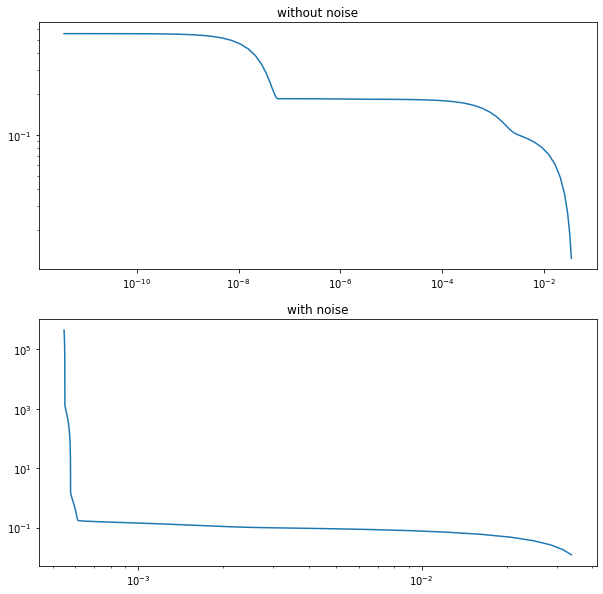

In [5]:
x1, y1, x2, y2 = result_Lcurve(10, 1, 0.01, -20)

* Find corner of L-curve

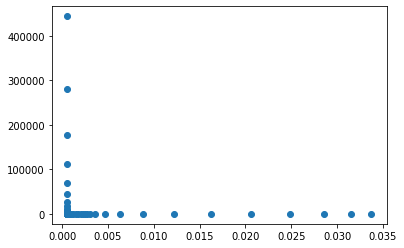

In [6]:
plt.rcParams["figure.figsize"] = (6,4)
plt.scatter(x2, y2)


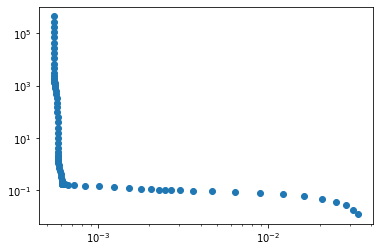

In [7]:
plt.rcParams["figure.figsize"] = (6,4)
plt.scatter(x2, y2)
plt.xscale("log")
plt.yscale("log")

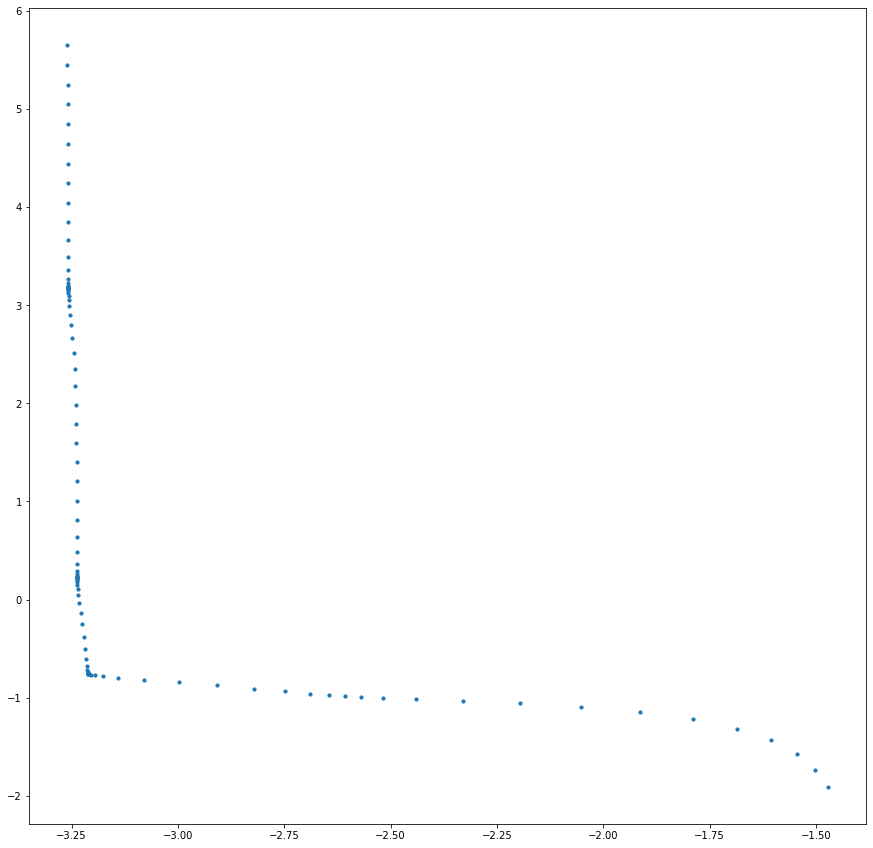

In [8]:
log_x2 = np.log10(x2)
log_y2 = np.log10(y2)
plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(log_x2, log_y2, s = 10)


plt.savefig("log_x2")

### 동일한 linspace로 자른 후 cos 값 구하기 --> 정밀성이 너무 떨어짐

In [9]:
#def find_nearest(array,value):
#    idx = np.searchsorted(array, value, side="left")
#    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
#        return idx-1
#    else:
#        return idx
#O1 = []
#max_log_x2 = np.max(log_x2)
#min_log_x2 = np.min(log_x2)
#log_al = np.linspace(min_log_x2, max_log_x2, 500)
#for i in range(500):
#    idx = find_nearest(log_x2, log_al[i])
#    O1.append([log_x2[idx], log_y2[idx]])
#O1 = np.array(O1)
#v = []
#for i in range(len(O1) - 1):
#    v.append(O1[i+1]-O1[i])
#v = np.array(v)
#
#cos = []
#
#for i in range(len(v)-1):
#    v1_norm = np.linalg.norm(v[i])
#    v2_norm = np.linalg.norm(v[i+1])
#    v_cos = np.dot(v[i], v[i+1])
#    cos.append(v_cos)
#a = np.argmin(cos)
#cos

## v[i]$\bullet$v[i+k] 사용하여 cos 구하기

In [10]:
def find_best_idx(log_x2, log_y2):
    O = np.column_stack((log_x2, log_y2))
    v = []
    k = 10
    for i in range(len(O) - 1 - k):
        v.append(O[i+k]-O[i])
    v

    cos = []

    for i in range(len(v)-1-k):
        v1_norm = np.linalg.norm(v[i])
        v2_norm = np.linalg.norm(v[i+k])
        v_cos = np.dot(v[i], v[i+k])/(v1_norm*v2_norm)
        cos.append(v_cos)
    a = np.argmin(cos) + k
    return a   

In [11]:
a = find_best_idx(log_x2, log_y2)
al = np.linspace(0, -20, 100)
alpha = 10**al[a]
alpha

2.8480358684358048e-15

In [ ]:
#alpha_target
#[1.1233240329780266e-15,
# 3.4304692863149193e-07,
# 1.2915496650148826e-09,
# 9.111627561154887e-05,
# 1.3219411484660288e-08,
# 8.302175681319736e-09,
# 5.214008287999695e-09,

In [22]:
# 모든 Q의 데이터 (M개)에 대하여 alpha값 뽑아내기
Q[1,:]

array([ 0.32852912, -0.19568233,  0.28826068,  0.1796691 ,  0.54488975])

In [21]:
F

array([[-4.89028461e-02,  1.20859110e-01, -1.88491925e-01, ...,
        -1.39864175e-01, -1.41858798e-02,  6.72543868e-02],
       [-1.60301151e-03, -3.58404681e-03,  3.08068921e-03, ...,
         6.66915778e-04, -6.85607613e-03, -5.80447582e-03],
       [-3.41323794e-05,  3.55741939e-05,  1.13456629e-05, ...,
        -1.47996894e-05,  3.98074519e-05, -6.36994097e-05],
       [-3.34479614e-08,  2.02190931e-08,  1.31034583e-08, ...,
        -3.04998268e-08,  4.50870719e-08, -3.97600475e-08],
       [-2.94979682e-12,  7.56739832e-12,  5.37741538e-13, ...,
        -6.99853018e-12,  2.74828887e-12, -4.57472492e-12]])

In [13]:
hatQ = sol_Tik(alpha, T, F)
nF = noise_data(F, delta = delta)

np.savetxt('hatQ.txt', hatQ, fmt='%8f', delimiter = ',', header='')

In [14]:
arr = []
for i in range(M):
    arr.append(i+1)

In [15]:
#load data
#column name에 data가 들어가있기 때문에 "names = arr" 로 처리해 줍니다. arr은 1 ~ len(F)의 숫자가 담겨있습니다.
dataF = pd.read_csv('C:/Users/Administrator/F.txt', sep = ',', names = arr)
#dataQ = pd.read_csv('C:/Users/Administrator/Q.txt', sep = ',', names = arr).to_numpy().T
dataQ = pd.read_csv('C:/Users/Administrator/hatQ.txt', sep = ',', names = arr)
data_nF = pd.read_csv('C:/Users/Administrator/nF.txt', sep = ',', names = arr)

In [16]:
def make_arr(A):
    arA = []
    for j in range(len(A.iloc[0, :])):
        arA1 = []
        for i in range(len(A.iloc[:,0])):
            tmpA = A.iloc[:,j][i]
            arA1.append(tmpA)
        arA.append(arA1)
    return arA

#make array
arrF = make_arr(dataF)
dataF = np.array(arrF)

arrQ = make_arr(dataQ)
dataQ = np.array(arrQ)

arr_nF = make_arr(data_nF)
data_nF = np.array(arr_nF)

In [17]:
import math
train_size = math.floor(len(dataF)*0.6) # train : 60%
val_size = math.floor(len(dataF)*0.2) #val : 20%
test_size = math.floor(len(dataF)*0.2) #test : 20%
#generate F_data, F_val, F_test
F_data = dataF[:train_size, :]
F_val = dataF[train_size:(val_size + train_size), :]
F_test = dataF[(val_size + train_size):(val_size + train_size + test_size), :]

#generate Q_data, Q_val, Q_test
Q_data = dataQ[:train_size, :]
Q_val = dataQ[train_size:(val_size + train_size), :]
Q_test = dataQ[(val_size + train_size):(val_size + train_size + test_size), :]

#generate nF_data, nF_val, nF_test
nF_data = data_nF[:train_size, :]
nF_val = data_nF[train_size:(val_size + train_size), :]
nF_test = data_nF[(val_size + train_size):(val_size + train_size + test_size), :]

print(f'{F_data.shape}, {F_test.shape}, {F_val.shape}')
print(f'{Q_data.shape}, {Q_test.shape}, {Q_val.shape}')
print(f'{nF_data.shape}, {nF_test.shape}, {nF_val.shape}')

(6000, 5), (2000, 5), (2000, 5)
(6000, 5), (2000, 5), (2000, 5)
(6000, 5), (2000, 5), (2000, 5)


In [18]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential() #Sequential

model.add(keras.layers.Dense(input_dim = N, units = 10, activation= "tanh",kernel_initializer ="HeNormal" )) 
model.add(keras.layers.Dense(20, activation= "tanh")) 
model.add(keras.layers.Dense(50, activation= "tanh"))  
model.add(keras.layers.Dense(100, activation= "tanh")) 
model.add(keras.layers.Dense(120, activation= "tanh")) 
model.add(keras.layers.Dense(50, activation= "tanh"))
model.add(keras.layers.Dense(N, activation= "tanh"))

In [19]:
with tf.device('/GPU:0'):
    F_train = tf.constant(F_data)
    Q_train = tf.constant(Q_data)
    nF_train = tf.constant(nF_data)
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

In [20]:
start_vect=time.time()

model.compile(loss = "mse",
              optimizer = "ADAM",
              metrics = ["accuracy"])
history = model.fit(x = F_train, y = Q_train, validation_data=(F_val, Q_val),epochs = 500)


print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

Epoch 1/500
188/188 [==============================] - 0s 922us/step - loss: 0.0359 - accuracy: 0.5292 - val_loss: 0.0293 - val_accuracy: 0.5840
Epoch 2/500
188/188 [==============================] - 0s 521us/step - loss: 0.0305 - accuracy: 0.5713 - val_loss: 0.0294 - val_accuracy: 0.5905
Epoch 3/500
188/188 [==============================] - 0s 511us/step - loss: 0.0306 - accuracy: 0.5755 - val_loss: 0.0292 - val_accuracy: 0.5840
Epoch 4/500
188/188 [==============================] - 0s 521us/step - loss: 0.0303 - accuracy: 0.5688 - val_loss: 0.0294 - val_accuracy: 0.5620
Epoch 5/500
188/188 [==============================] - 0s 532us/step - loss: 0.0303 - accuracy: 0.5782 - val_loss: 0.0292 - val_accuracy: 0.5905
Epoch 6/500
188/188 [==============================] - 0s 553us/step - loss: 0.0303 - accuracy: 0.5717 - val_loss: 0.0292 - val_accuracy: 0.5920
Epoch 7/500
188/188 [==============================] - 0s 580us/step - loss: 0.0304 - accuracy: 0.5795 - val_loss: 0.0293 - val_ac

188/188 [==============================] - 0s 548us/step - loss: 0.0127 - accuracy: 0.7653 - val_loss: 0.0140 - val_accuracy: 0.7485
Epoch 58/500
188/188 [==============================] - 0s 505us/step - loss: 0.0130 - accuracy: 0.7610 - val_loss: 0.0120 - val_accuracy: 0.7835
Epoch 59/500
188/188 [==============================] - 0s 511us/step - loss: 0.0127 - accuracy: 0.7663 - val_loss: 0.0120 - val_accuracy: 0.7795
Epoch 60/500
188/188 [==============================] - 0s 500us/step - loss: 0.0127 - accuracy: 0.7630 - val_loss: 0.0121 - val_accuracy: 0.7940
Epoch 61/500
188/188 [==============================] - 0s 511us/step - loss: 0.0127 - accuracy: 0.7670 - val_loss: 0.0121 - val_accuracy: 0.7980
Epoch 62/500
188/188 [==============================] - 0s 505us/step - loss: 0.0129 - accuracy: 0.7592 - val_loss: 0.0126 - val_accuracy: 0.7745
Epoch 63/500
188/188 [==============================] - 0s 500us/step - loss: 0.0126 - accuracy: 0.7703 - val_loss: 0.0123 - val_accuracy

188/188 [==============================] - 0s 527us/step - loss: 0.0122 - accuracy: 0.7807 - val_loss: 0.0120 - val_accuracy: 0.7840
Epoch 114/500
188/188 [==============================] - 0s 505us/step - loss: 0.0123 - accuracy: 0.7738 - val_loss: 0.0120 - val_accuracy: 0.7925
Epoch 115/500
188/188 [==============================] - 0s 505us/step - loss: 0.0123 - accuracy: 0.7738 - val_loss: 0.0118 - val_accuracy: 0.8060
Epoch 116/500
188/188 [==============================] - 0s 511us/step - loss: 0.0124 - accuracy: 0.7728 - val_loss: 0.0120 - val_accuracy: 0.7825
Epoch 117/500
188/188 [==============================] - 0s 511us/step - loss: 0.0123 - accuracy: 0.7748 - val_loss: 0.0119 - val_accuracy: 0.7930
Epoch 118/500
188/188 [==============================] - 0s 553us/step - loss: 0.0124 - accuracy: 0.7737 - val_loss: 0.0119 - val_accuracy: 0.8035
Epoch 119/500
188/188 [==============================] - 0s 521us/step - loss: 0.0123 - accuracy: 0.7770 - val_loss: 0.0119 - val_ac

Epoch 169/500
188/188 [==============================] - 0s 548us/step - loss: 0.0123 - accuracy: 0.7790 - val_loss: 0.0119 - val_accuracy: 0.7945
Epoch 170/500
188/188 [==============================] - 0s 527us/step - loss: 0.0122 - accuracy: 0.7835 - val_loss: 0.0118 - val_accuracy: 0.8050
Epoch 171/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7778 - val_loss: 0.0119 - val_accuracy: 0.7920
Epoch 172/500
188/188 [==============================] - 0s 511us/step - loss: 0.0122 - accuracy: 0.7855 - val_loss: 0.0120 - val_accuracy: 0.8035
Epoch 173/500
188/188 [==============================] - 0s 521us/step - loss: 0.0122 - accuracy: 0.7817 - val_loss: 0.0119 - val_accuracy: 0.7880
Epoch 174/500
188/188 [==============================] - 0s 505us/step - loss: 0.0125 - accuracy: 0.7728 - val_loss: 0.0118 - val_accuracy: 0.8060
Epoch 175/500
188/188 [==============================] - 0s 511us/step - loss: 0.0122 - accuracy: 0.7847 - val_loss: 0

Epoch 225/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7832 - val_loss: 0.0119 - val_accuracy: 0.8005
Epoch 226/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7872 - val_loss: 0.0118 - val_accuracy: 0.7950
Epoch 227/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7795 - val_loss: 0.0119 - val_accuracy: 0.7965
Epoch 228/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7843 - val_loss: 0.0128 - val_accuracy: 0.7770
Epoch 229/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7843 - val_loss: 0.0118 - val_accuracy: 0.7890
Epoch 230/500
188/188 [==============================] - 0s 532us/step - loss: 0.0122 - accuracy: 0.7815 - val_loss: 0.0119 - val_accuracy: 0.7955
Epoch 231/500
188/188 [==============================] - 0s 537us/step - loss: 0.0122 - accuracy: 0.7778 - val_loss: 0

Epoch 281/500
188/188 [==============================] - 0s 521us/step - loss: 0.0122 - accuracy: 0.7795 - val_loss: 0.0122 - val_accuracy: 0.7785
Epoch 282/500
188/188 [==============================] - 0s 553us/step - loss: 0.0121 - accuracy: 0.7850 - val_loss: 0.0119 - val_accuracy: 0.7925
Epoch 283/500
188/188 [==============================] - 0s 511us/step - loss: 0.0122 - accuracy: 0.7835 - val_loss: 0.0120 - val_accuracy: 0.7835
Epoch 284/500
188/188 [==============================] - 0s 511us/step - loss: 0.0122 - accuracy: 0.7825 - val_loss: 0.0118 - val_accuracy: 0.7970
Epoch 285/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7840 - val_loss: 0.0120 - val_accuracy: 0.7865
Epoch 286/500
188/188 [==============================] - 0s 500us/step - loss: 0.0122 - accuracy: 0.7847 - val_loss: 0.0121 - val_accuracy: 0.7850
Epoch 287/500
188/188 [==============================] - 0s 505us/step - loss: 0.0121 - accuracy: 0.7793 - val_loss: 0

Epoch 337/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7802 - val_loss: 0.0119 - val_accuracy: 0.8085
Epoch 338/500
188/188 [==============================] - 0s 505us/step - loss: 0.0121 - accuracy: 0.7775 - val_loss: 0.0118 - val_accuracy: 0.7920
Epoch 339/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7822 - val_loss: 0.0119 - val_accuracy: 0.7895
Epoch 340/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7835 - val_loss: 0.0120 - val_accuracy: 0.7920
Epoch 341/500
188/188 [==============================] - 0s 511us/step - loss: 0.0121 - accuracy: 0.7870 - val_loss: 0.0119 - val_accuracy: 0.7995
Epoch 342/500
188/188 [==============================] - 0s 505us/step - loss: 0.0122 - accuracy: 0.7773 - val_loss: 0.0120 - val_accuracy: 0.7965
Epoch 343/500
188/188 [==============================] - 0s 548us/step - loss: 0.0122 - accuracy: 0.7840 - val_loss: 0

Epoch 393/500
188/188 [==============================] - 0s 543us/step - loss: 0.0121 - accuracy: 0.7828 - val_loss: 0.0119 - val_accuracy: 0.7985
Epoch 394/500
188/188 [==============================] - 0s 532us/step - loss: 0.0122 - accuracy: 0.7837 - val_loss: 0.0118 - val_accuracy: 0.8040
Epoch 395/500
188/188 [==============================] - 0s 511us/step - loss: 0.0123 - accuracy: 0.7810 - val_loss: 0.0120 - val_accuracy: 0.7875
Epoch 396/500
188/188 [==============================] - 0s 511us/step - loss: 0.0121 - accuracy: 0.7812 - val_loss: 0.0118 - val_accuracy: 0.7995
Epoch 397/500
188/188 [==============================] - 0s 511us/step - loss: 0.0122 - accuracy: 0.7783 - val_loss: 0.0118 - val_accuracy: 0.8010
Epoch 398/500
188/188 [==============================] - 0s 505us/step - loss: 0.0121 - accuracy: 0.7823 - val_loss: 0.0123 - val_accuracy: 0.7910
Epoch 399/500
188/188 [==============================] - 0s 505us/step - loss: 0.0121 - accuracy: 0.7835 - val_loss: 0

Epoch 449/500
188/188 [==============================] - 0s 516us/step - loss: 0.0121 - accuracy: 0.7850 - val_loss: 0.0119 - val_accuracy: 0.7900
Epoch 450/500
188/188 [==============================] - 0s 516us/step - loss: 0.0121 - accuracy: 0.7817 - val_loss: 0.0119 - val_accuracy: 0.7995
Epoch 451/500
188/188 [==============================] - 0s 527us/step - loss: 0.0121 - accuracy: 0.7818 - val_loss: 0.0118 - val_accuracy: 0.7965
Epoch 452/500
188/188 [==============================] - 0s 569us/step - loss: 0.0121 - accuracy: 0.7822 - val_loss: 0.0118 - val_accuracy: 0.8065
Epoch 453/500
188/188 [==============================] - 0s 585us/step - loss: 0.0121 - accuracy: 0.7890 - val_loss: 0.0118 - val_accuracy: 0.8035
Epoch 454/500
188/188 [==============================] - 0s 548us/step - loss: 0.0122 - accuracy: 0.7797 - val_loss: 0.0119 - val_accuracy: 0.7980
Epoch 455/500
188/188 [==============================] - 0s 516us/step - loss: 0.0121 - accuracy: 0.7813 - val_loss: 0